## Συγγραφείς - Ομάδα 34

- Τσαμήτρος Νικόλαος με ΑΕΜ 10781
- Νατσιόπουλος Αθανάσιος Χρήστος με ΑΕΜ 10688

## Μέρος Δ

Στο μέρος Δ της εργασίας ζητείται να αναπτύξουμε ένα δικό μας αλγόριθμο ταξινόμησης με όποια μέθοδο επιθυμούμε. Για αυτόν τον σκοπό, μας δίνονται δύο αρχεία:
- To **datasetTV.csv**, το οποίο περιέχει συνολικά 8743 δείγματα, 224 χαρακτηριστικά ανά δείγμα και την ετικέτα στην τελευταία στήλη που παίρνει τιμές 1-5, θα χρησιμοποιηθεί ως **training set** για τον αλγόριθμό μας. Προφανώς, πρέπει να υπάρξει κάποια προεπεξεργασία των δεδομένων που μας δίνονται, καθώς σε αυτά μπορεί να υπάρχουν ελλιπή δεδομένα (NaN ή null values), θόρυβος, χαρακτηριστικά που δεν είναι χρήσιμα κλπ.
- Το **datasetTest.csv** περιέχει 6955 δείγματα χωρίς τις ετικέτες. Σε αυτά τα δεδομένα μας ζητείται να εφαρμόσουμε το τελικό μοντέλο μας και να εξάγουμε ένα διάνυσμα *labelsX.npy* διάστασης Ν=6955, το οποίο θα περιέχει τις ετικέτες των δεδομένων, όπως προβλέφθηκαν από το μοντέλο μας.  

### Φόρτωση των δεδομένων

Παρακάτω φορτώνουμε και διαβάζουμε το **datasetTV.csv** και βλέπουμε την δομή του και κάποια χαρακτηριστικά του. Συγκεκριμένα, με την *describe* μπορούμε να δούμε στατιστικά στοιχεία για τα features.

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

drive.mount('/content/drive')

data_file_path = '/content/drive/My Drive/Colab Notebooks/datasetTV.csv' # Change path if needed

data_set = pd.read_csv(data_file_path)

print(data_set.info())
print(data_set.head())
print(data_set.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8742 entries, 0 to 8741
Columns: 225 entries, 0.31253 to 1
dtypes: float64(224), int64(1)
memory usage: 15.0 MB
None
    0.31253   -0.2394  -0.0075684   0.52618  -0.09025  -0.26424   1.2662  \
0 -0.180790  0.439870   -0.146410  0.589490 -0.571440   1.31360  0.47487   
1  0.794690 -0.053940    0.002950 -0.134920  0.509670   1.02670  0.40173   
2 -0.056284 -0.224070   -0.237710 -0.065823 -0.086943   1.00600 -0.47638   
3  0.459540  0.346550   -0.056755  0.512780  0.221310  -0.27498  0.95194   
4  1.539600 -0.039854    1.181500  0.028609  0.645390   0.91781 -0.26332   

   0.057444  -0.23387  -0.42844  ...  -0.5445    0.9277  -0.051764  -0.088081  \
0  0.018913   0.51212 -0.147690  ...  0.49172  0.022198   0.936230  -0.218210   
1 -0.180840   0.44986 -0.272450  ... -0.23305  0.023855  -0.225070   0.589430   
2  0

### Οπτικοποίηση

Παρακάτω παρουσιάζονται γραφήματα τα οποία προκύπτουν από την εφαρμογή PCA στο σύνολο δεδομένων που δίνεται. Το PCA είναι μια τεχνική μείωσης διαστάσεων και την χρησιμοποιούμε εδώ για να απεικονίσουμε τα δεδομένα μας σε λιγότερες διαστάσεις, διατηρώντας ταυτόχρονα την περισσότερη πληροφορία. Τα γραφήματα δεν προσφέρουν κάποια διαχωριστική γραμμή μεταξύ των labels. Χρησιμοποιούνται μόνο για οπτικοποίηση ώστε να μας βοηθήσουν να καταλάβουμε καλύτερα την δομή των δεδομένων.
- **PCA 2D Visualization:** Στο αριστερό γράφημα παρουσιάζεται μία 2D αναπαράσταση των δύο κύριων συνιστωσών του dataset. Κάθε σημείο στο γράφημα αντοιστοιχεί σε ένα δείγμα του dataset το οποίο χρωματίζεται ανάλογα με την ετικέτα του.
- **PCA 3D Visualization:** Στο δεξί γράφημα παρουσιάζεται μία 3D αναπαράσταση των τριών κύριων συνιστωσών του dataset. Έτσι έχουμε μία καλύτερη απεικόνιση των δεδομένων μας. Όπως και στο 2D γράφημα, τα σημεία χρωματίζονται ανάλογα με τις ετικέτες τους.

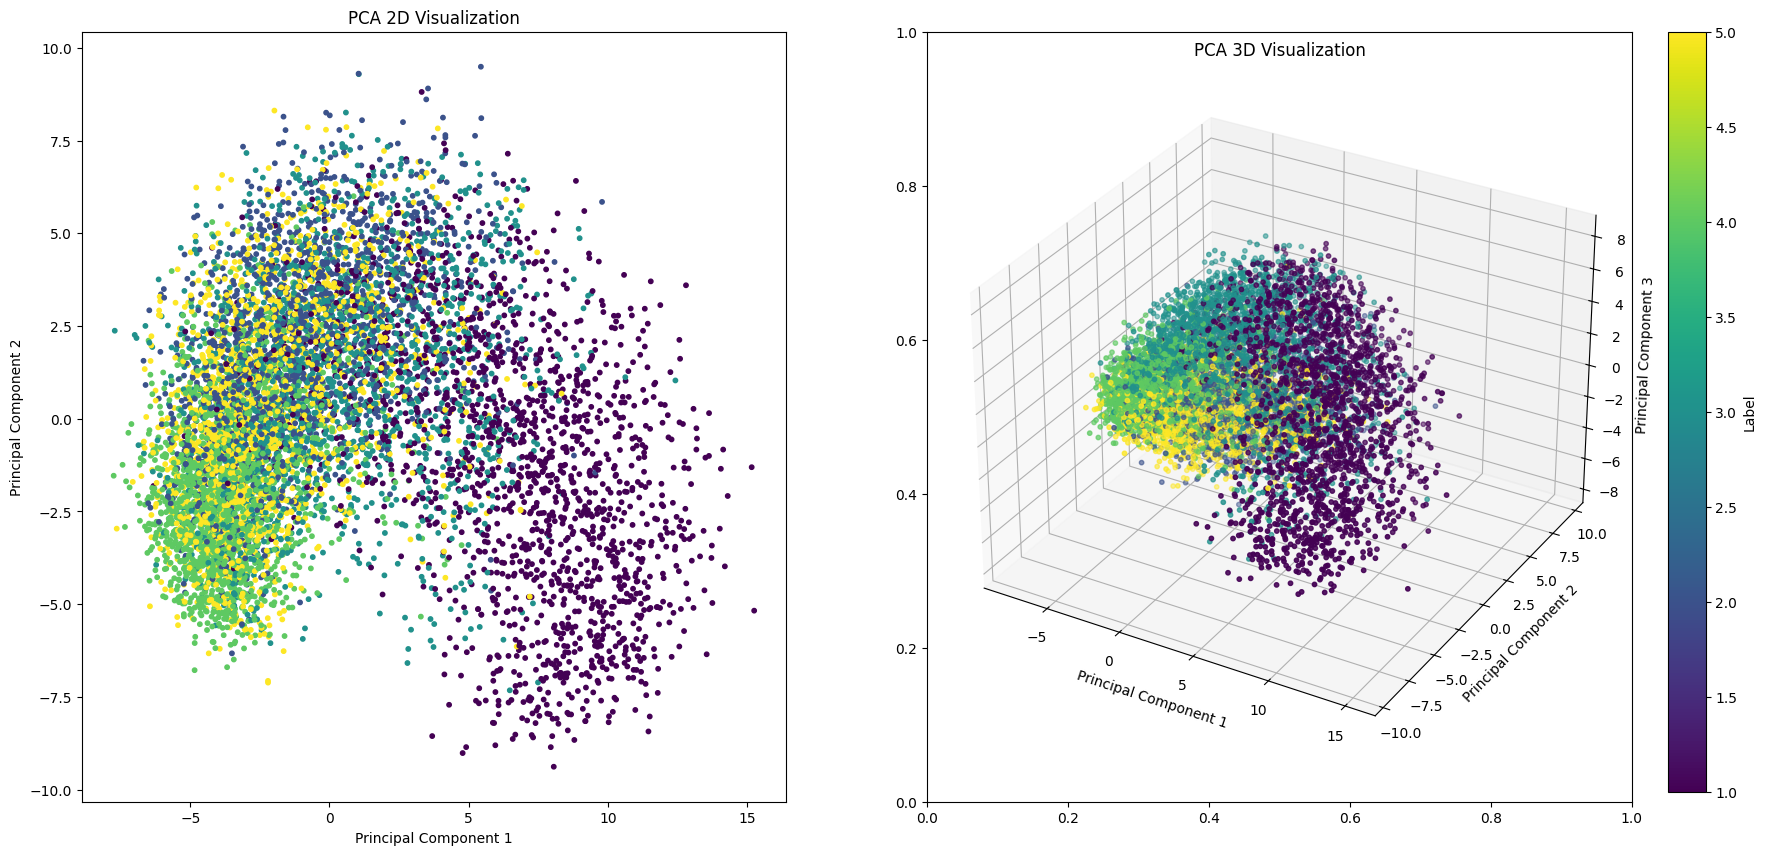

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

X = data_set.iloc[:, :-1] # get the features
y = data_set.iloc[:, -1] # get the labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y, cmap='viridis', s=10)
axes[0].set_title('PCA 2D Visualization')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

ax_3d = fig.add_axes([0.55, 0.1, 0.4, 0.8], projection='3d')
scatter = ax_3d.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=10)
ax_3d.set_title('PCA 3D Visualization')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

cbar = fig.colorbar(scatter, ax=ax_3d, fraction=0.08, shrink=0.95)
cbar.set_label('Label')

plt.show()

### Προεπεξεργασία Δεδομένων

- Αφαιρούμε τις NaN/null τιμές.
- Χωρίζουμε το αρχικό dataset σε train και test πριν την εφαρμογή scale και PCA ώστε να μην υπάρχει διαρροή δεδομένων (data leakage).
- Κλιμακώνουμε τα δεδομένα μας.
- Κάνουμε PCA κρατώντας τα features τα οποία εξηγούν τουλάχιστον το 95% της συνολικής διακύμανσης (variance) των δεδομένων.
- Εκτός από αυτά, δοκιμάσαμε και την αφαίρεση των outliers με τεχνικές όπως η **zcore** και η **IQR**, όμως είχαμε χειρότερη ακρίβεια, οπότε τις αφαιρέσαμε.

In [ ]:
from sklearn.model_selection import train_test_split

data_set = data_set.dropna().dropna(axis=1) # drop NaN/null values

X = data_set.iloc[:, :-1] # get the features
y = data_set.iloc[:, -1] # get the labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA keeping the features with variance 95%
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Initial number of features: {X.shape[1]}")
print(f"Number of features after PCA: {X_train_pca.shape[1]}")

Initial number of features: 224
Number of features after PCA: 190


### Δοκιμή Μοντέλων

#### Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_pca, y_train)
y_pred_baseline = dummy_clf.predict(X_test_pca)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {accuracy_baseline:.3f}")

Baseline Accuracy: 0.187


#### Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

y_pred = lda.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Accuracy: {accuracy:.3f}")

LDA Accuracy: 0.782


#### Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_pca, y_train)

y_pred = qda.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"QDA Accuracy: {accuracy:.3f}")

QDA Accuracy: 0.809


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_pca, y_train)

y_pred = nb.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.3f}")

Naive Bayes Accuracy: 0.759


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca, y_train)

y_pred = logistic_regression.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.3f}")

Logistic Regression Accuracy: 0.780


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.3f}")


Decision Tree Accuracy: 0.664


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_pca, y_train)

y_pred = rf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.3f}")

Random Forest Accuracy: 0.816


#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

adaboost.fit(X_train_pca, y_train)

y_pred = adaboost.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.3f}")

AdaBoost Accuracy: 0.688


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train_pca, y_train)

y_pred = gbm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"GBM Accuracy: {accuracy:.3f}")

GBM Accuracy: 0.799


#### XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_pca, y_train - y_train.min()) # y labels from [1,2,3,4,5] to [0,1,2,3,4]

y_pred = xgb.predict(X_test_pca)
accuracy = accuracy_score(y_test - y_test.min(), y_pred)
print(f"XGBoost Accuracy: {accuracy:.3f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:16:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.827


#### LightGBM


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train_pca, y_train)

y_pred = lgbm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.3f}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48450
[LightGBM] [Info] Number of data points in the train set: 6993, number of used features: 190
[LightGBM] [Info] Start training from score -1.604161
[LightGBM] [Info] Start training from score -1.612732
[LightGBM] [Info] Start training from score -1.589335
[LightGBM] [Info] Start training from score -1.649259
[LightGBM] [Info] Start training from score -1.592845
XGBoost Accuracy: 0.833


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### SVM with Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
}

svm = SVC(kernel='rbf', random_state=42)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

print(f"Best SVM parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.3f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM test accuracy: {accuracy:.3f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVM parameters: {'C': 10, 'gamma': 'auto'}
Best accuracy: 0.851
SVM test accuracy: 0.869


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train_pca, y_train)

y_pred = KNN.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"ΚΝΝ accuracy: {accuracy:.3f}")

ΚΝΝ accuracy: 0.829


#### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

svm_model = SVC(kernel='rbf', C=10, gamma='auto', random_state=42, probability=True)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
knn_model = KNeighborsClassifier(n_neighbors=15)

meta_model = LogisticRegression(solver='saga', max_iter=1000)

stacking_model = StackingClassifier(
    estimators=[('svm', svm_model), ('rf', rf_model), ('knn', knn_model),],
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train_pca, y_train)

y_pred = stacking_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Accuracy: {accuracy:.3f}")

Stacking Accuracy: 0.876


### Συμπεράσματα
Από τα παραπάνω, παρατηρούμε πως το καλύτερο μοντέλο είναι ο **StackingClassifier** με ακρίβεια 87.6%. Η επιτυχία του οφείλεται στο ότι συνδυάζει ετερογενή μοντέλα με διαφορετικές υποθέσεις, προσεγγίσεις και δυνατά σημεία και καταλήγει σε μια απόφαση. Συγκεκριμένα για τα base models που χρησιμοποιήθηκαν:
- **SVM**: Ανιχνεύει γραμμικές σχέσεις σε δεδομένα υψηλής διάστασης.
- **Random Forest**: Χειρίζεται μη γραμμικές σχέσεις και θόρυβο.
- **KNN**: Βρίσκει τοπικές συσχετίσεις μεταξύ των δεδομένων.
- Η **logistic regression** ως meta model λειτούργησε καλά για την ζύγιση των προβλέψεων των base models, μειώνοντας τα σφάλματα και βελτιώνοντας τη γενίκευση.

Άρα λοιπόν, στο συγκεκριμένο dataset, ο **StackingClassifier** αξιοποιώντας τις πληροφορίες από τα διαφορετικά μοντέλα, πέτυχε συνολικά βελτιωμένη απόδοση.

### Προεπεξεργασία του datasetTest.csv
- Λόγω των διαφορετικών feature names μεταξύ του training set και του test set, αλλάζουμε τα ονόματα των features του test set ώστε να είναι ίδια με του training.
- Κάνουμε scale με τον scaler του training set.
- Κάνουμε pca με το pca του training set.

In [ ]:
test_file_path = '/content/drive/My Drive/Colab Notebooks/datasetTest.csv' # Change path if needed

# Read the datasetTest.csv
test_set = pd.read_csv(test_file_path)

# Cannot just transform as the feature names on test_set are different than X_train
# which we used to fit our scaler and pca.
# Also fit_transform isn't optimal as there will be data leakage.
# Also cannot choose the interesection of the cols as there aren't any. In that case
# we'd fill the rest with 0 values
# Solution: Change the feature names of test_set to be equal to X_train's feature names

test_set.columns = X_train.columns
test_set_scaled = scaler.transform(test_set)
test_set_pca = pca.transform(test_set_scaled)

### Εφαρμογή του καλύτερου μοντέλου στο test set
Εφαρμόζουμε τον εκπαιδευμένο StackingClassifier στο test set και σώζουμε τα προβλεπόμενα labels.

In [ ]:
# Predict the labels according to the best model.
test_set_labels = stacking_model.predict(test_set_pca)

np.save('labelsX.npy', test_set_labels)

In [ ]:
loaded_labels = np.load('labelsX.npy')
print(loaded_labels.shape[0])
print(loaded_labels)

6954
[4 5 2 ... 3 5 1]


### Download `labelsX.npy`

In [ ]:
from google.colab import files

files.download('labelsX.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>